In [1]:
import warnings

import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from aeon.datasets import load_basic_motions
from aeon.classification.shapelet_based import ShapeletTransformClassifier
from aeon.classification.sklearn import RotationForestClassifier
from aeon.transformations.collection.shapelet_based import RandomShapeletTransform

warnings.filterwarnings("ignore")

C:\Users\Divya Tiwari\anaconda3\envs\aeon-dev\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
X = np.array([[1, 2 ,5],[2, 4 ,9]])
X

array([[1, 2, 5],
       [2, 4, 9]])

In [3]:
y = np.transpose(X)
y

array([[1, 2],
       [2, 4],
       [5, 9]])

## Basic Motion dataset

This data set contains time series of motion traces for the activities “running”, “walking”, “standing” and “badminton”. The learning problem is to predict the activity given the time series. Each time series has six channels: the x, y, z position and the x, y, z accelerometer of the wrist. Data was recorded on a smartwatch.

In [4]:
X,y = load_basic_motions(split="train")

In [5]:
X.shape

(40, 6, 100)

## Shapelet Transform for Classification

In [6]:
rst = RandomShapeletTransform(n_shapelet_samples=100, max_shapelets=10, random_state=42)
st = rst.fit_transform(X, y)
print(" Shape of transformed data = ", st.shape)
print(" Distance of second series to third shapelet = ", st[1][2])

 Shape of transformed data =  (40, 8)
 Distance of second series to third shapelet =  1.302772121165026


In [7]:
rst.shapelets

[(0.81127812,
  39,
  55,
  0,
  11,
  'running',
  array([-0.85667017, -1.88711152, -0.8751295 ,  0.80633757,  1.10838333,
          0.69810992,  0.85713394,  1.23190921,  0.01801365, -1.29683966,
         -1.94694259, -0.37487726, -0.37487726,  1.39471462,  0.74922685,
          0.74922685,  0.22343376,  0.22343376, -0.7730703 , -1.37591995,
         -0.80376393,  1.32758071,  0.99778845,  0.6013481 ,  0.83711118,
          0.93684593,  0.93684593, -1.30429475, -1.64522057, -0.56312308,
          0.96855713,  0.56796251,  0.35714242,  0.62066541,  0.65135287,
         -0.80531237, -1.49170075, -1.18512797,  0.69685753])),
 (0.81127812,
  39,
  47,
  5,
  27,
  'walking',
  array([ 1.21791274,  0.65941679, -0.03388761, -0.69348991, -1.41327462,
         -1.41327462, -0.84755776, -0.58275387, -0.26017454,  0.01185116,
          0.57034711,  1.13847185,  1.34790726,  1.54049207,  1.26605849,
          0.84718766,  0.1322169 , -0.7729308 , -1.25198495, -1.35790705,
         -1.11476861, 

In [8]:
testX, testy = load_basic_motions(split="test")
tr_test = rst.transform(testX)
rf = RandomForestClassifier(random_state=10)
rf.fit(st, y)
preds = rf.predict(tr_test)
print(" Shapelets + random forest acc = ", accuracy_score(preds, testy))

 Shapelets + random forest acc =  0.95


In [9]:
running_shapelet = rst.shapelets[0]
print("Quality = ", running_shapelet[0])
print("Length = ", running_shapelet[1])
print("position = ", running_shapelet[2])
print("Channel = ", running_shapelet[3])
print("Origin Instance Index = ", running_shapelet[4])
print("Class label = ", running_shapelet[5])
print("Shapelet = ", running_shapelet[6])

Quality =  0.81127812
Length =  39
position =  55
Channel =  0
Origin Instance Index =  11
Class label =  running
Shapelet =  [-0.85667017 -1.88711152 -0.8751295   0.80633757  1.10838333  0.69810992
  0.85713394  1.23190921  0.01801365 -1.29683966 -1.94694259 -0.37487726
 -0.37487726  1.39471462  0.74922685  0.74922685  0.22343376  0.22343376
 -0.7730703  -1.37591995 -0.80376393  1.32758071  0.99778845  0.6013481
  0.83711118  0.93684593  0.93684593 -1.30429475 -1.64522057 -0.56312308
  0.96855713  0.56796251  0.35714242  0.62066541  0.65135287 -0.80531237
 -1.49170075 -1.18512797  0.69685753]


 Badminton shapelet from channel 0 (x-dimension) (0.54144607, 22, 74, 0, 38, 'badminton', array([-0.44593537, -0.50281453, -0.24815517,  0.2035129 ,  0.40241343,
       -0.57551448, -0.36076186, -0.21226312,  0.17188364, -0.64465165,
       -1.02161745, -0.50148008,  0.45766539,  0.89338695,  0.89338695,
        3.80224382,  0.77930418, -1.01189932, -0.56696965, -0.60338664,
       -0.60338664, -0.30496129]))


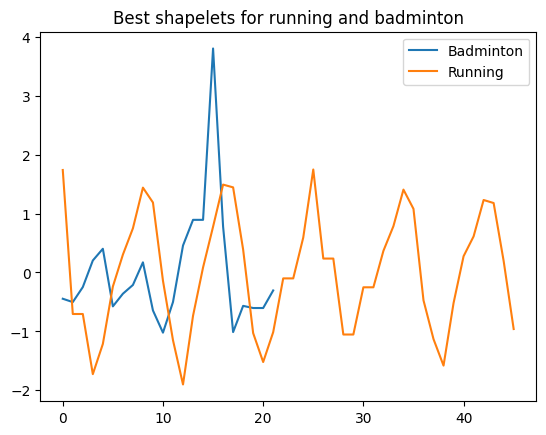

In [10]:
import matplotlib.pyplot as plt

running_shapelet = rst.shapelets[2]
badminton_shapelet = rst.shapelets[6]
print(" Badminton shapelet from channel 0 (x-dimension)", badminton_shapelet)
plt.title("Best shapelets for running and badminton")
plt.plot(badminton_shapelet[6], label="Badminton")
plt.plot(running_shapelet[6], label="Running")
plt.legend()

In [11]:
clf = ShapeletTransformClassifier(
    estimator=RotationForestClassifier(n_estimators=3),
    n_shapelet_samples=100,
    max_shapelets=10,
    batch_size=20
)
clf.fit(X,y)

ShapeletTransformClassifier(batch_size=20,
                            estimator=RotationForestClassifier(n_estimators=3),
                            max_shapelets=10, n_shapelet_samples=100)

In [12]:
preds = clf.predict(testX)
print('Model Accuracy = ', accuracy_score(testy,preds))

Model Accuracy =  0.9


## Learning Shapelets

In [13]:
from aeon.classification.shapelet_based import LearningShapeletClassifier

In [14]:
clf = LearningShapeletClassifier(n_shapelets_per_size={30:5,25:5}, verbose=0)

In [15]:
clf.fit(X,y)

LearningShapeletClassifier(n_shapelets_per_size={25: 5, 30: 5})

In [16]:
pred = clf.predict(testX)
print(accuracy_score(testy,pred))

0.95


## Learning Shapelet from TSLearn

In [17]:
from tslearn.shapelets import LearningShapelets

In [18]:
tslearn_format_X = np.transpose(X, (0, 2, 1))

In [19]:
tslearn_format_X.shape

(40, 100, 6)

In [20]:
clf = LearningShapelets(n_shapelets_per_size = {25:8, 30: 6}, verbose = 0)
clf.fit(tslearn_format_X, y)

LearningShapelets(n_shapelets_per_size={25: 8, 30: 6})

In [21]:
testX.shape

(40, 6, 100)

In [22]:
tslearn_test_X = np.transpose(testX, (0,2,1))
pred = clf.predict(tslearn_test_X)

In [23]:
accuracy_score(pred, testy)

1.0

In [27]:
from aeon.classification.shapelet_based import LearningShapeletClassifier

In [28]:
LearningShapeletClassifier

aeon.classification.shapelet_based._ls.LearningShapeletClassifier

In [29]:
from aeon.classification.shapelet_based import ShapeletTransformClassifier

In [30]:
ShapeletTransformClassifier

aeon.classification.shapelet_based._stc.ShapeletTransformClassifier

In [31]:
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from aeon.datasets import load_basic_motions
from aeon.registry import all_estimators
from aeon.transformations.collection.shapelet_based import RandomShapeletTransform

warnings.filterwarnings("ignore")
all_estimators("classifier", filter_tags={"algorithm_type": "shapelet"})

[('LearningShapeletClassifier',
  aeon.classification.shapelet_based._ls.LearningShapeletClassifier),
 ('MrSQMClassifier',
  aeon.classification.shapelet_based._mrsqm.MrSQMClassifier),
 ('RDSTClassifier', aeon.classification.shapelet_based._rdst.RDSTClassifier),
 ('ShapeletTransformClassifier',
  aeon.classification.shapelet_based._stc.ShapeletTransformClassifier)]